In [70]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

In [71]:
train = pd.read_csv("E:/DataScience_Study/3months/Data-Lit/week4-Regression/4.4_Big_mart_problem/Train_UWu5bXk.csv")
test = pd.read_csv("E:/DataScience_Study/3months/Data-Lit/week4-Regression/4.4_Big_mart_problem/Test_u94Q5KV.csv")

In [72]:
#make copies of this dataset for rest of code:
df_train = train.copy()
df_test = test.copy()

In [75]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [76]:
target = df_train['Item_Outlet_Sales'] # target bvariable

In [77]:
# Drop target variable from training dataset
df_train = df_train.drop('Item_Outlet_Sales', axis=1)

In [79]:
 #assing an extra variable to training and testing dataset before joining them
df_train['training_set'] = True
df_test['training_set'] = False

df_full = pd.concat([df_train, df_test])

In [80]:
df_full.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'training_set'],
      dtype='object')

In [81]:
df_full.drop('Item_Identifier', axis=1, inplace=True)

In [82]:
df_full.shape

(14204, 11)

In [84]:
df_full.columns.to_series().groupby(df_full.dtypes).groups # grouped by data types


{dtype('bool'): Index(['training_set'], dtype='object'),
 dtype('int64'): Index(['Outlet_Establishment_Year'], dtype='object'),
 dtype('float64'): Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'),
 dtype('O'): Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object')}

# Analysis

In [88]:
# We analyse target varibale : Item_Outlet_Sales 
print("There are {} NA values in 'Item_Outlet_Sales' ".format(target.isnull().sum()))

There are 0 NA values in 'Item_Outlet_Sales' 


In [90]:
# let's get some stats on the 'Item_Outlet_Sales' variable
minimum_price = np.min(target)
maximum_price = np.max(target)
mean_price = np.mean(target)
median_price = np.median(target)
std_price = np.std(target)

# Show the calculated statistics
print("Statistics for the supplied Item_Outlet_Sales training dataset:")
print("Minimum sales: ${:,.2f}".format(minimum_price))
print("Maximum sales: ${:,.2f}".format(maximum_price))
print("Mean sales: ${:,.2f}".format(mean_price))
print("Median sales ${:,.2f}".format(median_price))
print("Standard deviation of sales ${:,.2f}".format(std_price))

Statistics for the supplied Item_Outlet_Sales training dataset:
Minimum sales: $33.29
Maximum sales: $13,086.96
Mean sales: $2,181.29
Median sales $1,794.33
Standard deviation of sales $1,706.40


C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


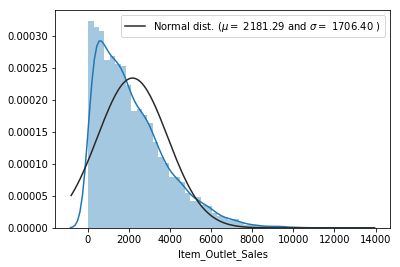

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.distplot(target, fit=norm)
mu, sigma = norm.fit(target) # for grtting mean and Std, deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

In [98]:
print("Skewness: %f" % target.skew()) # positive / right skew so will apply log transformation in order to skewness to zero

Skewness: 1.177531


In [99]:
target = np.log(target)

C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: -0.887753


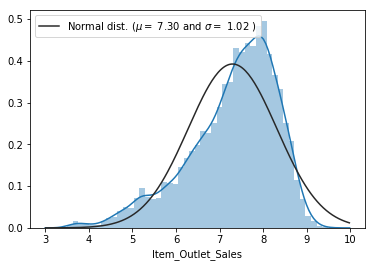

In [101]:

sns.distplot(target, fit=norm)
mu, sigma = norm.fit(target) # for grtting mean and Std, deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
print("Skewness: %f" % target.skew())

In [51]:
train.dtypes
#test.dtypesaxis

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

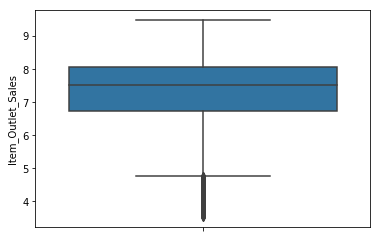

In [102]:
#  To get a visual of the outliers, let's plot a box plot.
sns.boxplot(y = target)

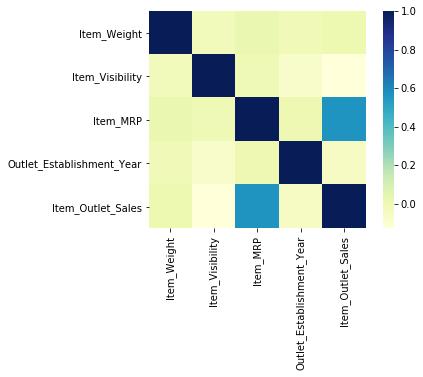

In [104]:
corrmat = train.corr()
sns.heatmap(corrmat,square=True, cmap="YlGnBu");

# Handling missing values

In [108]:
total = df_full.isnull().sum().sort_values(ascending = False)
total

Outlet_Size                  4016
Item_Weight                  2439
training_set                    0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
dtype: int64

In [112]:
perc = (df_full.isnull().sum()/df_full.isnull().count()*100).sort_values(ascending = False)
perc

Outlet_Size                  28.273726
Item_Weight                  17.171219
training_set                  0.000000
Outlet_Type                   0.000000
Outlet_Location_Type          0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Item_MRP                      0.000000
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Fat_Content              0.000000
dtype: float64

In [113]:
missing_data = pd.concat([total, perc], axis=1, keys=('Total', 'percent'))
missing_data.head(20)

,Total,percent
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219
training_set,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Identifier,0,0.000000
Item_MRP,0,0.000000
Item_Type,0,0.000000
Item_Visibility,0,0.000000


In [114]:
df_full = df_full.drop((missing_data[missing_data['Total'] > 0]).index,1)

In [115]:
df_full.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
training_set                 0
dtype: int64

C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 0.130728


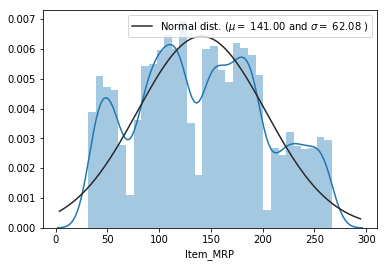

In [117]:
# outliers
sns.distplot(df_full['Item_MRP'], fit=norm)
mu, sigma = norm.fit(df_full['Item_MRP']) # for grtting mean and Std, deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
print("Skewness: %f" % df_full['Item_MRP'].skew()) # no outliers

# using one hot encoding
#convert categorical variable into dummy


In [131]:
df_full = pd.get_dummies(df_full)
df_full.shape

(14204, 42)

In [134]:
# separate my joined dataframe into training and testing dataframe
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)

df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

(df_train.shape, df_test.shape)


((8523, 41), (5681, 41))

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, target, train_size=0.8, random_state=1234)

C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def predict_metrics(model, x, y):
    pred = model.predict(x)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    return mse, mae, r2

# Lasso

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso = Lasso()

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5 )
lasso_regressor.fit(X_train, y_train)

C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the n

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [139]:
lasso_regressor.best_params_


{'alpha': 0.001}

In [143]:
lasso_regressor.best_score_  


-0.2890371978576791

In [142]:
best_model = lasso_regressor.best_estimator_


In [146]:
mse_train, mae_train, r2_train = predict_metrics(lasso_regressor, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train", r2_train)

mse_test, mae_test, r2_test = predict_metrics(lasso_regressor, X_test, y_test)
print("test mse:", mse_test," test mae:", mae_test," R2-test", r2_test)

train mse: 0.28717517274063326  train mae: 0.4144851207726373  R2-train 0.7244207835256276
test mse: 0.2941947850354654  test mae: 0.4277761779945484  R2-test 0.7064708269962192


# predict on test data

In [148]:
y_pred_lasso = lasso_regressor.predict(df_test)
y_pred_lasso

array([7.25960045, 7.04225201, 6.36243192, ..., 7.27434475, 8.18089859,
       6.99279934])

In [149]:
y_pred_final = np.exp(y_pred_lasso) # we use log previously
y_pred_final

array([1421.68838726, 1143.96092274,  579.65431816, ..., 1442.80548983,
       3572.06303282, 1088.76503865])

# Final submission


In [154]:

my_submission = pd.DataFrame({'Item_Identifier': test.Item_Identifier, 'Outlet_Identifier':test.Outlet_Identifier, 'Item_Outlet_Sales': y_pred_final})


In [155]:
my_submission.to_csv('E:/DataScience_Study/3months/Data-Lit/week4-Regression/4.4_Big_mart_problem/submission-ak.csv', index=False)